In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
Salary_data=pd.read_csv('Salary_Data.csv')

In [5]:
Salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
Salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
Salary_data.shape

(30, 2)

In [8]:
#to specify my feature and target
## Split the dataset into input (feature X) and output (Target y) from Pandas dataFrame named dataset

X= Salary_data.iloc[:, :-1].values   #All rows, all columns excluding the last column indexed -1

Y= Salary_data.iloc[:, 1].values     #All rows, column 1

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
# to fit a linear regression model to our training dataset, we carry out the following
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#we use the following commands to obtain the intercept and the slope of our model respectively
print(regressor.intercept_)

print(regressor.coef_)


26780.09915062818
[9312.57512673]


In [12]:
#We use the score to know how well the data sets in use fit the model.
#this is also known as the coefficient of determination
regressor.score(x_train, y_train)

#from our result, we have that 94% of the change in y is as a result of a change in x

0.9411949620562126

In [13]:
#Same interpretation as above but in this case it is higher and this may be due to the small size of the test dataset
regressor.score(x_test,y_test)

0.988169515729126

In [14]:
#This shows the correlation between the feature and the target

corr=Salary_data.corr()

corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
#The Linear relationship between years of experience(X) and salary(Y) is :

#   Y_pred = 9312.58(X) + 26780.1

#    correlation= 0.9782



In [16]:
#Now, we use our test features to predict output based on the model the machine has trained on

y_pred=regressor.predict(x_test)

y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

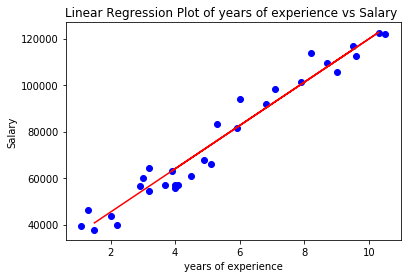

In [17]:
#We can visualize a scatter plot of the data as well as fit a regression line based on our model

plt.scatter(X, Y, c='b')

plt.plot(x_test,y_pred, c='r')

plt.title('Linear Regression Plot of years of experience vs Salary ')
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.show()

#The regression line appears to have done a good job. 
#However this can only be confirmed when we evaluate the model based on its errors.

In [18]:
# I created a dataframe of the actual salaries and the predicted salaries 
data={'Salary':y_test, 'Salary_pred':y_pred }

df=pd.DataFrame(data)
df

,Salary,Salary_pred
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [19]:
df['Years of Experience']=x_test

df

,Salary,Salary_pred,Years of Experience
0,37731.0,40748.961841,1.5
1,122391.0,122699.622956,10.3
2,57081.0,64961.657170,4.1
3,63218.0,63099.142145,3.9
4,116969.0,115249.562855,9.5
5,109431.0,107799.502753,8.7


In [20]:
#to calculate the errors on prediction
df['Error']=df['Salary'].subtract(df['Salary_pred'])

df

,Salary,Salary_pred,Years of Experience,Error
0,37731.0,40748.961841,1.5,-3017.961841
1,122391.0,122699.622956,10.3,-308.622956
2,57081.0,64961.657170,4.1,-7880.657170
3,63218.0,63099.142145,3.9,118.857855
4,116969.0,115249.562855,9.5,1719.437145
5,109431.0,107799.502753,8.7,1631.497247


In [21]:
#In order to evaluate the errors of the model, I imported 'metrics' from library sklearn
from sklearn import metrics

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

#we can see that the mean squared error is very large

Mean Squared Error:  12823412.298126549


In [22]:
#For the mean absolute error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  2446.1723690465055


In [23]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  3580.979237321343


In [24]:
print('Coefficient of Determination:', metrics.r2_score(y_test,y_pred))

Coefficient of Determination: 0.988169515729126


In [25]:
Error=df['Error']

In [26]:
print('Variance: ', np.var(Error))

Variance:  11160408.738086158


In [27]:
#From the very large errors obtaind, we can suggest thet the regression equation does not fit very well with the data.

#We can do some transformation to see if there will be any change in the error.

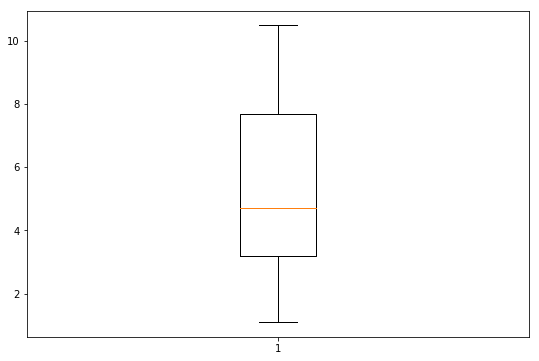

In [43]:
fig=plt.figure(1, figsize=(9,6))

ax=fig.add_subplot(111)

bp=ax.boxplot(X)




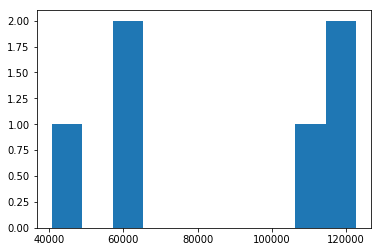

In [29]:
plt.hist(y_pred)
plt.show()

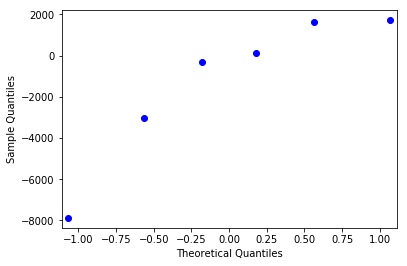

In [30]:
#Normality QQplot
from statsmodels.graphics.gofplots import qqplot

qqplot(Error)
plt.show()

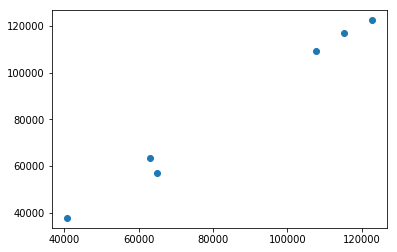

In [31]:
plt.scatter(y_pred, y_test)

plt.show()

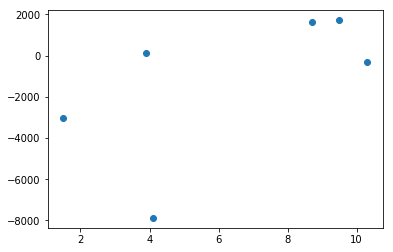

In [38]:
#Residual plot
plt.scatter(x_test, Error)

plt.show()

In [113]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
Xtr_poly= poly_reg.fit_transform(x_train)
Xte_poly= poly_reg.fit_transform(x_test)
poly_reg.fit(Xtr_poly,y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [114]:
reg2=LinearRegression()
reg2.fit(Xtr_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
reg2.score(Xtr_poly, y_train)

0.9412018325566514

In [116]:
print('The intercept of the polynomial model is: ', reg2.intercept_)

print('The slope of the polynomial model is: ', reg2.coef_)

The intercept of the polynomial model is:  27013.670321992795
The slope of the polynomial model is:  [   0.         9205.97080896    9.47566012]


In [117]:
Poly_pred=reg2.predict(Xte_poly)

Poly_pred

array([ 40843.9467707 , 122840.44243636,  64917.43648533,  63061.08126735,
       115325.5713329 , 107822.82907439])

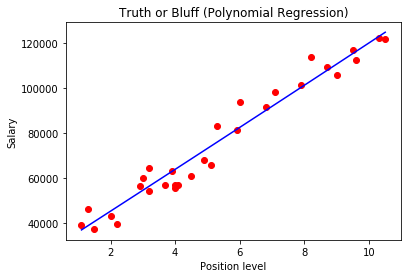

In [118]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [119]:
data2={'Salary':y_test, 'Poly Pred':Poly_pred}

dt=pd.DataFrame(data2)

dt

,Poly Pred,Salary
0,40843.946771,37731.0
1,122840.442436,122391.0
2,64917.436485,57081.0
3,63061.081267,63218.0
4,115325.571333,116969.0
5,107822.829074,109431.0


In [120]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, Poly_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, Poly_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, Poly_pred)))

Mean Squared Error:  12768977.981324105
Mean Absolute Error:  2467.8906696260724
Root Mean Squared Error:  3573.3706750523525
